# Inicio

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("bank_train.csv")
df_clean = df.copy()
df_test = pd.read_csv("bank_test.csv")
df_test_clean = df_test.copy()

## Mapeamento

In [164]:
#Treino
df_clean['y'] = df_clean['y'].replace({"yes": 1, "no": 0})
df_clean['loan'] = df_clean['loan'].replace({'no': 0, 'n': 0, 'y':1, 'yes':1})
df_clean['default'] = df_clean['default'].replace({'no': 0, 'yes':1})
df_clean['housing'] = df_clean['housing'].replace({'no': 0, 'yes':1})
#Teste
df_test_clean['loan'] = df_test_clean['loan'].replace({'no': 0, 'n': 0, 'y':1, 'yes':1})
df_test_clean['default'] = df_test_clean['default'].replace({'no': 0, 'yes':1})
df_test_clean['housing'] = df_test_clean['housing'].replace({'no': 0, 'yes':1})

#MAPEAMENTOS
#Treino
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Aplicar o mapeamento à coluna 'month'
df_clean['month'] = df_clean['month'].map(month_mapping)

#Teste

month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Aplicar o mapeamento à coluna 'month'
df_test_clean['month'] = df_test_clean['month'].map(month_mapping)

education_mapping = {
    'primary': 1, 'secondary': 2, 'tertiary': 3
}

# Aplicar o mapeamento à coluna 'month'
df_clean['education'] = df_clean['education'].map(education_mapping)
#Teste
df_test_clean['education'] = df_test_clean['education'].map(education_mapping)

marital_mapping = {
    'single': 1, 'married': 2, 'divorced': 3
}

df_clean['marital'] = df_clean['marital'].map(marital_mapping)
#Teste
df_test_clean['marital'] = df_test_clean['marital'].map(marital_mapping)

contact_mapping = {
    'cellular': 1, 'unknown': 0, 'telephone': 2
}

df_clean['contact'] = df_clean['contact'].map(contact_mapping)
#Teste
df_test_clean['contact'] = df_test_clean['contact'].map(contact_mapping)

job_mapping = {
    'management':1, 'blue-collar':2, 'student':3, 'self-employed':4, 'technician':5,
 'administrator':6, 'retired':7, 'housemaid':8, 'services':9, 'unemployed':10,
 'admin.':6, 'unknown':0, 'entrepreneur':11 
}

df_clean['job'] = df_clean['job'].map(job_mapping)
#Teste
df_test_clean['job'] = df_test_clean['job'].map(job_mapping)
#aa


## Limpeza de colunas


In [165]:
#Treino
df_clean = df_clean.drop(columns=['location'])
df_clean = df_clean.drop(columns=['poutcome'])
df_clean = df_clean.drop(columns=['id'])
#Teste
df_test_clean = df_test_clean.drop(columns=['location'])
df_test_clean = df_test_clean.drop(columns=['poutcome'])

In [166]:
df_clean = df_clean[df_clean['job'] != 'unknown']
df_clean = df_clean[df_clean['education'] != 'unknown']
df_clean = df_clean.dropna(subset=['marital'])
df_clean = df_clean.dropna(subset=['job'])
df_clean = df_clean.dropna(subset=['contact'])

## Remoção de outliers


In [167]:
df_clean= df_clean[(df_clean['balance'] < 15000) & (df_clean['balance'] > -5000) ]
df_clean = df_clean[(df_clean['age'] <= 80) & (df_clean['age'] > 8)]


In [152]:

df_clean = df_clean.dropna(subset=['education'])
df_clean = df_clean.dropna(subset=['previous'])
df_clean = df_clean.dropna(subset=['campaign'])


In [168]:
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,41.00,1.00,1.00,3.00,0,4522.00,0,0,1.00,28,8,55,1.00,-1,0.00,0
1,42.00,2.00,2.00,1.00,1,398.00,1,0,0.00,16,5,251,4.00,-1,0.00,0
2,26.00,3.00,1.00,2.00,0,706.00,0,0,0.00,8,10,118,1.00,105,2.00,0
3,54.00,1.00,2.00,3.00,0,0.00,0,1,1.00,19,11,307,3.00,-1,0.00,0
4,43.00,4.00,2.00,2.00,0,918.00,1,0,0.00,6,5,193,1.00,-1,0.00,0


# Tratando o unknown da categoria contato

Preenchendo colunas faltantes de 'contact' via modelo


In [62]:
known = df_clean[df_clean['contact'].isin([0, 2])] #0 é celular, 2 é telefone
unknow = df_clean[df_clean['contact'].isin([1])] #1 é desconhecido

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [64]:
# Dividir os dados em conjuntos de treino e teste

from sklearn.model_selection import train_test_split

X = known.drop(columns=['contact']) #dados sem contato, ou seja, sem o target
y = known['contact'] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier(n_neighbors = 5)
modelKNN.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
y_pred = modelKNN.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8332578160398731


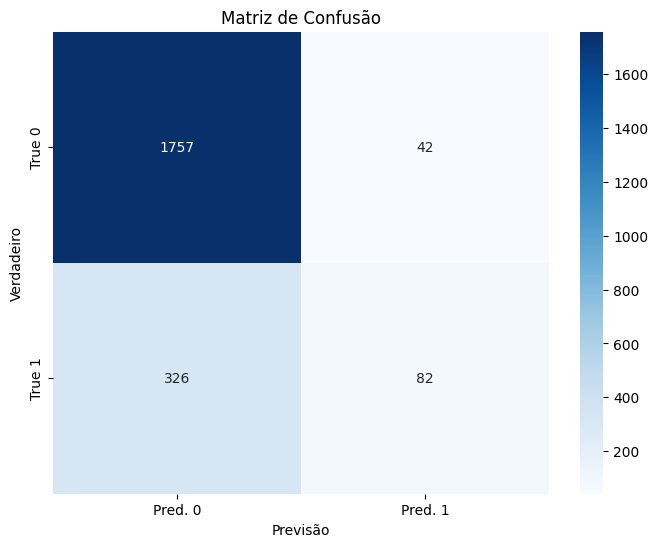

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred. 0', 'Pred. 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [68]:
contact_counts = df_clean['contact'].value_counts()
print(contact_counts)

contact
1.00    20823
0.00     9107
2.00     1927
Name: count, dtype: int64


In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

ModuleNotFoundError: No module named 'imblearn'

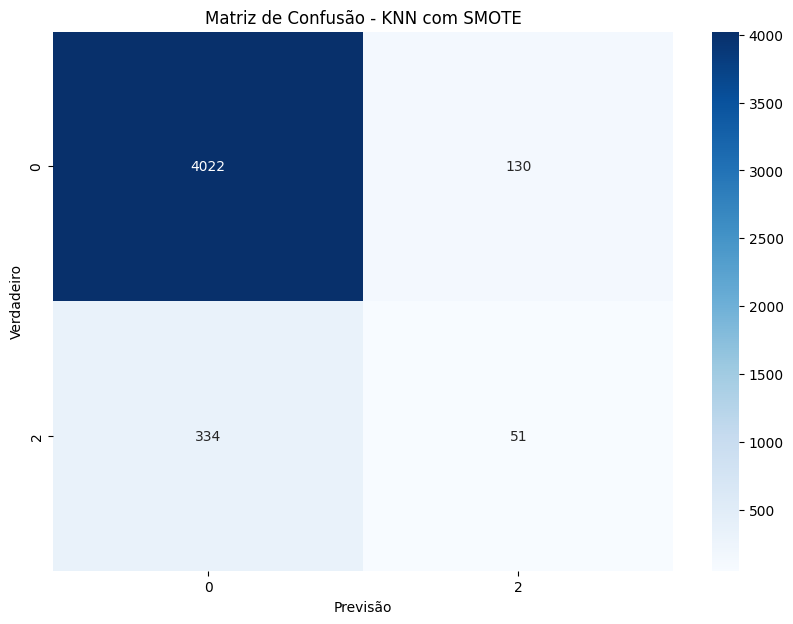

In [110]:
modelRFC = RandomForestClassifier()
modelRFC.fit(X_train_res, y_train_res)

# Fazer previsões
y_pred = modelRFC.predict(X_test)

# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=modelRFC.classes_, yticklabels=modelRFC.classes_)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - KNN com SMOTE')
plt.show()

In [111]:
y_pred = modelKNN.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9111747851002865


Oversampling


In [103]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# Crie o objeto SMOTE
smote = SMOTE(random_state=42)

# Aplique o SMOTE para o conjunto de treinamento
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Exiba os resultados
print("Antes do SMOTE:")
print(y_train.value_counts())
print("TESTE Antes do SMOTE:")
print(pd.Series(y_test).value_counts())


print("\nDepois do SMOTE:")
print(pd.Series(y_resampled).value_counts())

ImportError: cannot import name '_get_threadpool_controller' from 'sklearn.utils.parallel' (c:\Users\André DIas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\parallel.py)

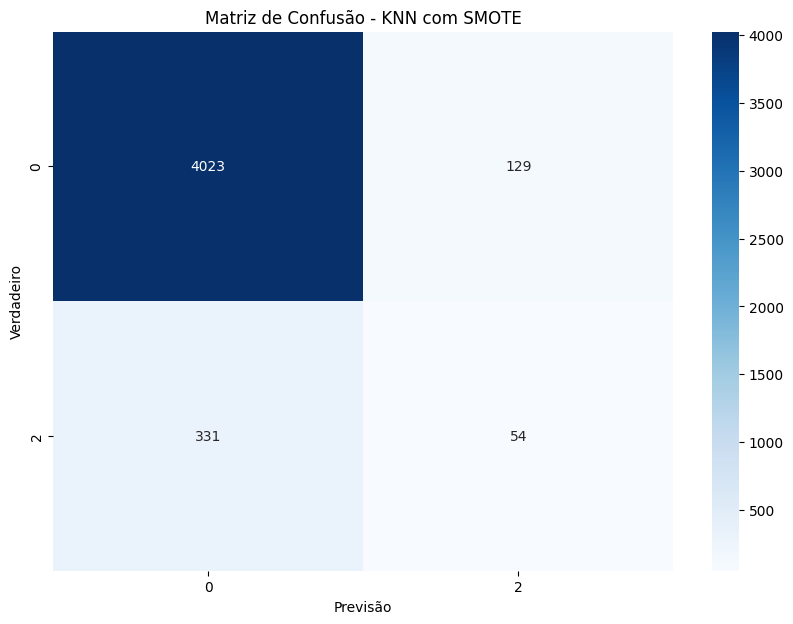

In [113]:
model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

# Fazer previsões
y_pred = model.predict(X_test)

# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - KNN com SMOTE')
plt.show()

Undersampling

In [102]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
# Crie o objeto RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

# Aplique o undersampling para o conjunto de treinamento
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

# Treine um modelo de regressão logística com os dados subamostrados
model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)

# Faça previsões no conjunto de teste
y_pred = model.predict(X_test)

# Crie a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exiba a matriz de confusão
print("Matriz de Confusão:")
print(cm)

# Plotar a matriz de confusão usando seaborn para uma visualização melhor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred. 0', 'Pred. 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

ImportError: cannot import name '_get_threadpool_controller' from 'sklearn.utils.parallel' (c:\Users\André DIas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\parallel.py)

Rascunho


In [123]:
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,41.00,1.00,1.00,3.00,0,4522.00,0,0,1.00,28,8,55,1.00,-1,0.00,0
1,42.00,2.00,2.00,1.00,1,398.00,1,0,0.00,16,5,251,4.00,-1,0.00,0
2,26.00,3.00,1.00,2.00,0,706.00,0,0,0.00,8,10,118,1.00,105,2.00,0
3,54.00,1.00,2.00,3.00,0,0.00,0,1,1.00,19,11,307,3.00,-1,0.00,0
4,43.00,4.00,2.00,2.00,0,918.00,1,0,0.00,6,5,193,1.00,-1,0.00,0


In [124]:
df_clean.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [73]:
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
scaler = StandardScaler()
numerical_cols = ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']

df_normalizado = df_clean.copy()

df_normalizado[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

In [74]:
df_normalizado.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,0.03,1.00,1.00,3.00,0,1.65,0,0,1.00,1.47,0.77,-0.11,-0.57,-0.42,-0.31,0
1,0.13,2.00,2.00,1.00,1,-0.39,1,0,0.00,0.02,-0.48,-0.04,0.41,-0.42,-0.31,0
2,-1.41,3.00,1.00,2.00,0,-0.24,0,0,0.00,-0.94,1.60,-0.09,-0.57,0.63,0.74,0
3,1.29,1.00,2.00,3.00,0,-0.59,0,1,1.00,0.38,2.02,-0.02,0.08,-0.42,-0.31,0
4,0.23,4.00,2.00,2.00,0,-0.13,1,0,0.00,-1.18,-0.48,-0.06,-0.57,-0.42,-0.31,0


In [21]:
from sklearn.model_selection import train_test_split

# Definir variáveis independentes (X) e dependente (y)
X = df_normalizado.drop('y', axis=1)
y = df_normalizado['y']

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)


In [ ]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.90               0.71     0.71      0.89   
DecisionTreeClassifier             0.87               0.71     0.71      0.88   
LGBMClassifier                     0.90               0.69     0.69      0.89   
BaggingClassifier                  0.89               0.67     0.67      0.88   
RandomForestClassifier             0.90               0.66     0.66      0.89   
PassiveAggressiveClassifier        0.78               0.66     0.66      0.81   
AdaBoostClassifier                 0.89               0.65     0.65      0.88   
NearestCentroid                    0.66               0.64     0.64      0.72   
QuadraticDiscriminantAnalysis      0.79               0.64     0.64      0.81   
ExtraTreeClassifier                0.85               0.63     0.63      0.85   
GaussianNB                  

# Unknown como categoria de contato

## Testes com o modelo XGBClassifier

In [169]:
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,41.00,1.00,1.00,3.00,0,4522.00,0,0,1.00,28,8,55,1.00,-1,0.00,0
1,42.00,2.00,2.00,1.00,1,398.00,1,0,0.00,16,5,251,4.00,-1,0.00,0
2,26.00,3.00,1.00,2.00,0,706.00,0,0,0.00,8,10,118,1.00,105,2.00,0
3,54.00,1.00,2.00,3.00,0,0.00,0,1,1.00,19,11,307,3.00,-1,0.00,0
4,43.00,4.00,2.00,2.00,0,918.00,1,0,0.00,6,5,193,1.00,-1,0.00,0


In [172]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X = df_clean.drop(columns=['y'])
y = df_clean['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)


Normalização dos dados

In [133]:
from sklearn.preprocessing import StandardScaler

cols_to_normalize = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

scaler = StandardScaler()
X_train[cols_to_normalize] = scaler.fit_transform(X_train[cols_to_normalize])
X_test[cols_to_normalize] = scaler.transform(X_test[cols_to_normalize])

KeyError: "['day'] not in index"

In [173]:
from xgboost import XGBClassifier

modelXGBC = XGBClassifier()
modelXGBC.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [174]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = modelXGBC.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)


Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      6084
           1       0.59      0.41      0.48       852

    accuracy                           0.89      6936
   macro avg       0.76      0.69      0.71      6936
weighted avg       0.88      0.89      0.88      6936



Tentando otimizar os hiperparâmetros


In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

xgb = XGBClassifier(objective = 'binary:logistic', use_label_encoder = False, eval_metric = 'logloss')

param_grid = {
   'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.02, 0.05, 0.1],
    'reg_alpha': [0.0, 0.1, 0.5, 1.0]
}

# Usar GridSearchCV para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Treinar o modelo com os melhores hiperparâmetros
best_params = grid_search.best_params_
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

In [105]:
y_pred_best = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_best)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred_best)
print('Classification Report:\n', report)

predictions(best_model)

Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      5635
           1       0.61      0.46      0.53       737

    accuracy                           0.90      6372
   macro avg       0.77      0.71      0.74      6372
weighted avg       0.89      0.90      0.90      6372

Predictions saved to predictions.csv


In [24]:
df_clean.groupby('y').count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
y,,,,,,,,,,,,,,,
0,28159,28159,28159,28159,28159,28159,28159,28159,28159,28159,28159,28159,28159,28159,28159
1,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698


Testando oversampling para balancear o data frame

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

X_train = df_clean.drop(columns=['y'])
y_train = df_clean['y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

GridSearch para hiperparâmetros

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(objective = 'binary:logistic', use_label_encoder = False, eval_metric = 'logloss')

grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.02, 0.05, 0.1],
    'reg_alpha': [0.0, 0.1, 0.5, 1.0]}

grid_search = GridSearchCV(estimator = xgb, param_grid = grid, cv = 5, scoring = 'f1', verbose = 3, n_jobs = -1)
grid_search.fit(X_train_res, y_train_res)

print("Melhores hiperparâmetros:", grid_search.best_params_)

# Melhor modelo
best_params = grid_search.best_params_

In [ ]:
best_model = XGBClassifier(objective = 'binary:logistic', use_label_encoder = False, eval_metric = 'logloss', **best_params)
best_model.fit(X_train_res, y_train_res)

# Prever no conjunto de teste
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

# Relatório de classificação
print(classification_report(y_test, y_pred))

predictions(best_model)

Função para output 

In [26]:
def predictions(model):
    X_test_final = df_test_clean.drop(columns=['id'])
    ids = df_test_clean['id']

    # Fazer previsões
    y_pred_final = model.predict(X_test_final)

    # Criar um DataFrame com os resultados
    results = pd.DataFrame({
        'id': ids,
        'y': y_pred_final
    })

    # Salvar os resultados em um arquivo CSV
    results.to_csv('predictions.csv', index=False)
    print('Predictions saved to predictions.csv')

In [122]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31746 entries, 0 to 39999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        31746 non-null  float64
 1   job        31746 non-null  int64  
 2   marital    31746 non-null  int64  
 3   education  31746 non-null  float64
 4   default    31746 non-null  int64  
 5   balance    31746 non-null  float64
 6   housing    31746 non-null  int64  
 7   loan       31746 non-null  int64  
 8   contact    31746 non-null  int64  
 9   day        31746 non-null  int64  
 10  month      31746 non-null  int64  
 11  duration   31746 non-null  int64  
 12  campaign   31746 non-null  float64
 13  pdays      31746 non-null  int64  
 14  previous   31746 non-null  float64
 15  y          31746 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 4.1 MB


In [121]:
df_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4916 entries, 0 to 5210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         4916 non-null   int64  
 1   age        4759 non-null   float64
 2   job        4916 non-null   object 
 3   marital    4916 non-null   object 
 4   education  4725 non-null   float64
 5   default    4916 non-null   int64  
 6   balance    4681 non-null   float64
 7   housing    4916 non-null   int64  
 8   loan       4916 non-null   int64  
 9   contact    4916 non-null   int64  
 10  day        4916 non-null   int64  
 11  month      4916 non-null   int64  
 12  duration   4916 non-null   int64  
 13  campaign   4734 non-null   float64
 14  pdays      4916 non-null   int64  
 15  previous   4879 non-null   float64
dtypes: float64(5), int64(9), object(2)
memory usage: 652.9+ KB
